# Libraries
* Execute this cell before going any further.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq

<br/><br/>

# Warmup

## Signal Processing


In this warmup activity, you'll explore how Fourier transforms convert signals between time and frequency domains—a critical technique in NMR spectroscopy. You'll generate a complex signal, transform it to view its frequency components, apply filtering, and reconstruct the filtered signal.

This process mirrors how actual NMR data is processed: raw FID signals are converted to the frequency domain where specific frequencies can be isolated or enhanced, and noise can be removed. By implementing this signal processing pipeline step-by-step, you'll gain intuition for how spectral data is manipulated to extract meaningful information from experimental measurements.

As you work through the code, pay attention to how the filtering changes your signal's appearance. Consider how these same principles apply when processing the complex signals that emerge from actual NMR instruments.

### GIVEN CODE
* Execute the blocks below. Don't modify these.

In [2]:
# Step 1: Generate and plot a raw signal
# Time domain settings
sampling_rate = 500  # Hz
duration = 1.0       # seconds
t = np.linspace(0, duration, int(sampling_rate * duration))

# Generate a composite signal (3 frequencies + noise)
freqs = [5, 15, 50]  # Hz
amplitudes = [1.0, 0.5, 0.25]

# Generate the signal
signal = np.zeros_like(t)
for freq, amp in zip(freqs, amplitudes):
    signal += amp * np.sin(2 * np.pi * freq * t)

# Add noise
noise_level = 0.3
noise = noise_level * np.random.randn(len(t))
noisy_signal = signal + noise

### CODE
- Plot the time domain spectrum.
- Perfrom a fourier transform using the fft() function.
- Plot the resulting frequency domain data.
- Truncate all frequencies above a certain threshold to eliminate noise.
- Plot the resulting frequency domain data.
- Use an inverse fourier transform, ifft(), to convert the data back to the time domain.
- Plot the resulting time domain data.


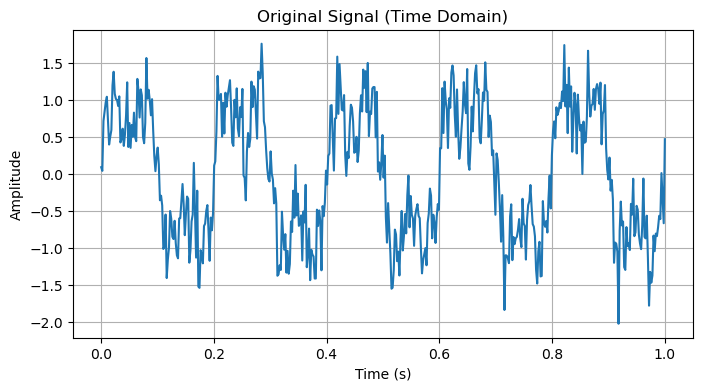

In [3]:
# Plot original signal in time domain
plt.figure(figsize=(8, 4))
plt.plot(t, noisy_signal)
plt.title('Original Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

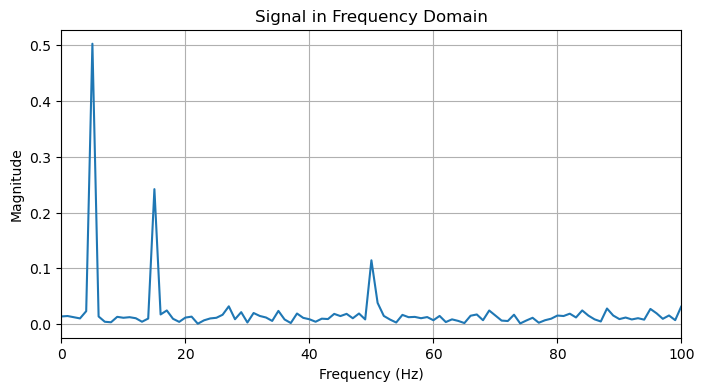

In [4]:
# Step 2: Compute and plot the FFT
N = len(t)
fft_signal = fft(noisy_signal)
freqs = fftfreq(N, 1/sampling_rate)

# We only need positive frequencies for plotting
pos_freqs = freqs[:N//2]
pos_fft = np.abs(fft_signal[:N//2]) / N  # Normalize

# Plot original signal in frequency domain
plt.figure(figsize=(8, 4))
plt.plot(pos_freqs, pos_fft)
plt.title('Signal in Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)  # Focus on first 100 Hz
plt.grid(True)
plt.show()

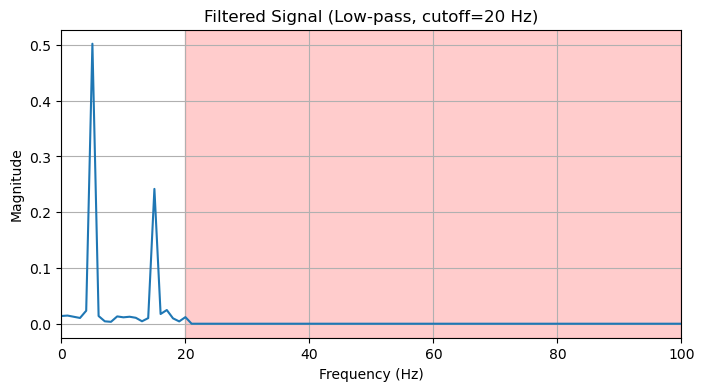

In [5]:


# Step 3: Apply a low-pass filter and plot
cutoff_freq = 20  # Hz 
filtered_fft = fft_signal.copy()
filtered_fft[np.abs(freqs) > cutoff_freq] = 0  # Zero out high frequencies

# Plot filtered signal in frequency domain
pos_filtered_fft = np.abs(filtered_fft[:N//2]) / N
plt.figure(figsize=(8, 4))
plt.plot(pos_freqs, pos_filtered_fft)
plt.title(f'Filtered Signal (Low-pass, cutoff={cutoff_freq} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)
plt.axvspan(cutoff_freq, 100, alpha=0.2, color='red')  # Highlight filtered region
plt.grid(True)
plt.show()


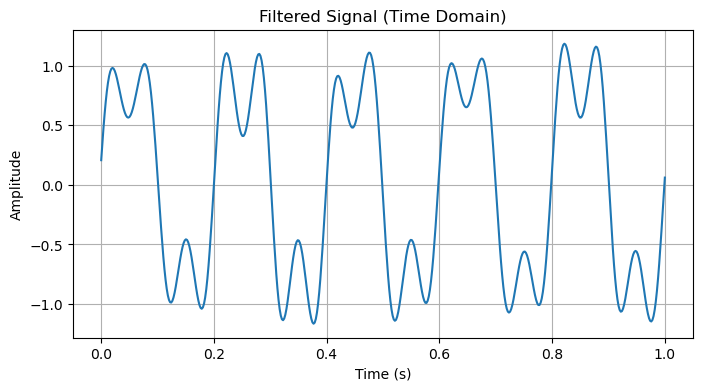

In [6]:

# Step 4: Convert back to time domain and plot
filtered_signal = ifft(filtered_fft).real

# Plot filtered signal in time domain
plt.figure(figsize=(8, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

<br/><br/>
<br/><br/>

# Magnetism and Precession

Before we can understand what an NMR instrument does, we should understand what is happening for individual nuclei in the sample.

## Magnetic Energy Splitting
Protons and neutrons, like electrons, are spin-one-half particles. Nuclei are made of protons and neutrons. In general, a nucleus with an odd number of protons and neutrons will be spin one-half and a nucleus with an even number of these will be spin zero. Nuclei are charged, so their spin angular momentum generates a magnetic moment which interacts with an external magnetic field to increase or decrease the energy of the nucleus.

The energy splitting depends the __gyromagnetic ratio__ $\gamma$, which is different for each nucleus ($~2.68\times{}10^8 s^{-1}T^{-1}$for hydrogen), and the strength of the applied field, $B_0$.
$$
\Delta{}E = \gamma{}B_0\hbar
$$ 
(where $B_0$ is the applied magnetic field)

We call the lower energy state ($m_s = +\frac{1}{2}$) the $\alpha$ state and the higher energy state ($m_s = -\frac{1}{2}$) the $\beta$ state.

The magnetism experienced by a nucleus in a molecule is not necessarily the same as the strength of the applied field $B_0$. A magnetic field will induce currents in the electron cloud of a molecule, and these will either reinforce or oppose the applied field. This is called shielding, which we represent by the parameter $\sigma$:
$$
B_{eff} = (1-\sigma)B_0
$$

Plugging this into our formula for energy splitting:
$$
\Delta{}E = \gamma{}B_{z}\hbar =  \gamma{}(1-\sigma)B_0\hbar
$$

So energy depends on three parameters: $\gamma$, $\sigma$, and $B_0$.


### CODE
* Create a function for $\Delta_E$. It should accept the parameters gamma, alpha, and B_0 and return the energy. Don't worry about units.

In [7]:
def delta_E(gamma,alpha,B_0):
    return gamma * (1 - alpha) * B_0

In [8]:
def plot_stuff(B_0):
    x_vals = np.linspace(0,10,100)
    y_vals = np.linspace(0,1,100)
    X,Y = np.meshgrid(x_vals, y_vals)
    Bnot = B_0
    Z = delta_E(X,Y,Bnot)
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111,projection='3d')
    
    ax.plot_surface(X,Y,Z, cmap='viridis')
    
    ax.set_xlabel('$\\gamma$')
    ax.set_ylabel('$\\sigma$')
    # ax.set_zlabel('f(x,y)')
    ax.set_title('$\\Delta{}E$')
    # plt.gca.invert_axis()
    ax.set_zlim(0,200)
    
    plt.tight_layout()
    
    plt.show()

In [9]:
widgets.interact(
    plot_stuff,
    B_0 = (0,20,1)
)

interactive(children=(IntSlider(value=10, description='B_0', max=20), Output()), _dom_classes=('widget-interac…

<function __main__.plot_stuff(B_0)>

### SHORT RESPONSE QUESTIONS
1. How does the energy required to promote a nucleus from the alpha state to the beta state depend on the nucleus? On nearby functional groups?
<!-- 2. How does a 3d plot with a slider allow us to explore a function which depends on three parameters? How else could we visualize it? What other problems do you encounter that such visualization techniques might be useful for exploring? -->
### ANSWERS

1. It depends on the nucleus because each nucleus has a unique gyromagnetic ratio, which will determine how strongly it interacts with a magnetic field.
It will depend on nearby functional groups, because these will determine the strength of induced currents and thus the local magnetic field.

<br/><br/>

## Magnetic Precession
As we've seen, if a particle's magnetic moment is parallel or antiparallel to an applied field, this will rather straightforwardly increase or decrease its energy. But what happens if the magnetic moment is oriented perpendicular to the field, or at some arbitrary angle from parallel? 

This would occur if the particle was in an angular momentum eigenstate for an axis not aligned with the magnetic field. When a nucleus exists in such a state, the applied field $B_z$ will cause its magnetic moment to precess - that is, to rotate about the z axis. More precisely, the expectation values of the x and y components of angular momentum will change in time.
	$$
    \braket{I_x} = \frac{\hbar}{2}sin(\alpha)cos(\gamma{}B_zt)
	$$
    $$
    \braket{I_y} = -\frac{\hbar}{2}sin(\alpha)sin(\gamma{}B_zt)
    $$
	(Where $B_z = (1-\alpha)B_0$ and $\alpha$ is the angle between the spin axis and the z-axis)

We will use the symbol $\omega_0$ for the angular frequency of oscillation. Notice that this value, equal to $\gamma{}B_z$, is exactly equal to the energy difference between the $\alpha$ and $\beta$ states divided by $\hbar$:
$$
\omega_0 = \gamma{}B_z = \frac{\Delta{}E}{\hbar}
$$

This is rather interesting: the frequency at which spin precesses is precisely the frequency of electromagnetic radiation that would induce transitions between the energy levels! This is called the Larmor frequency, and it is a fundamental value for obtaining an NMR spectrum.


### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib import cm

def plot_precession(angle=30, B0=1.0, time=0.0):
    """
    Plot the precession of a spin in a magnetic field using atomic units.
    
    Parameters:
    angle : float
        Angle between the spin and the z-axis in degrees
    B0 : float
        Strength of the magnetic field (relative scale)
    time : float
        Time in arbitrary units (0-1 represents a full cycle)
    """
    # Clear previous plot
    clear_output(wait=True)
    
    # Create new figure
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Convert angle to radians
    angle_rad = np.radians(angle)
    
    # For simplicity, we'll use a scaled frequency that makes visualization easier
    # This makes one full time unit (0-1) correspond to one full cycle
    omega = 2 * np.pi * B0  # full cycle when time=1
    
    # Energy difference (proportional to B0)
    energy_diff = B0
    
    # Plot axes and labels
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_zlim(-1.2, 1.2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Spin Precession in Magnetic Field\nB₀ = {B0:.1f}, Angle = {angle}°')
    
    # Draw B0 field vector
    ax.quiver(0, 0, 0, 0, 0, 1.0, color='blue', arrow_length_ratio=0.1, label='B₀')
    
    # Current precession position 
    current_angle = omega * time
    x_position = np.sin(angle_rad) * np.cos(current_angle)
    y_position = np.sin(angle_rad) * np.sin(current_angle)
    z_position = np.cos(angle_rad)
    
    # Draw magnetic moment vector
    ax.quiver(0, 0, 0, x_position, y_position, z_position, 
             color='red', arrow_length_ratio=0.1, label='μ')
    
    # Draw the cone as a surface
    # Create cone around the current position
    cone_half_angle = np.radians(20)  # Smaller cone for clarity
    
    # Generate cone using meshgrid for better surface plotting
    u = np.linspace(0, 1, 8)  # Height along cone axis (fewer points for speed)
    v = np.linspace(0, 2*np.pi, 12)  # Angle around cone (fewer points for speed)
    
    U, V = np.meshgrid(u, v)
    
    # Create cone aligned with z-axis
    X = U * np.sin(cone_half_angle) * np.cos(V)
    Y = U * np.sin(cone_half_angle) * np.sin(V)
    Z = U * np.cos(cone_half_angle)
    
    # Rotation matrix to align cone with the magnetic moment
    # First, find the rotation that takes [0,0,1] to our moment direction
    from_vec = np.array([0, 0, 1])
    to_vec = np.array([x_position, y_position, z_position])
    
    # Simple rotation for this case - just rotate around the origin
    # This simplified approach works for our visualization purposes
    # Get the current position angle in the XY plane
    phi = np.arctan2(y_position, x_position)
    
    # First rotate around y-axis to get the right zenith angle
    theta = np.arccos(z_position)
    
    # Apply rotations to each point
    X_rot, Y_rot, Z_rot = np.zeros_like(X), np.zeros_like(Y), np.zeros_like(Z)
    
    # Apply the rotations
    # First around y-axis (theta)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            # Rotate point
            x, y, z = X[i,j], Y[i,j], Z[i,j]
            
            # Rotate around y-axis by theta
            x_new = x * np.cos(theta) + z * np.sin(theta)
            y_new = y
            z_new = -x * np.sin(theta) + z * np.cos(theta)
            
            # Rotate around z-axis by phi
            X_rot[i,j] = x_new * np.cos(phi) - y_new * np.sin(phi)
            Y_rot[i,j] = x_new * np.sin(phi) + y_new * np.cos(phi)
            Z_rot[i,j] = z_new
    
    # Plot the cone as a surface
    ax.plot_surface(X_rot, Y_rot, Z_rot, alpha=0.3, color='green', 
                   rstride=1, cstride=1, linewidth=0)
    
    # Draw the circular path for precession (just the circle, not individual points)
    theta_path = np.linspace(0, 2*np.pi, 40)  # Fewer points for speed
    x_path = np.sin(angle_rad) * np.cos(theta_path)
    y_path = np.sin(angle_rad) * np.sin(theta_path)
    z_path = np.cos(angle_rad) * np.ones_like(theta_path)
    ax.plot(x_path, y_path, z_path, 'b--', alpha=0.5, label='Precession path')
    
    # Current position on the precession path
    ax.scatter([x_position], [y_position], [z_position], color='red', s=50)
    
    # Add simplified formula display
    formula_text = (
        f"$\\langle I_x \\rangle = \\frac{{\\hbar}}{{2}}\\sin({angle}°)\\cos(\\omega t)$\n"
        f"$\\langle I_y \\rangle = -\\frac{{\\hbar}}{{2}}\\sin({angle}°)\\sin(\\omega t)$\n"
        f"$\\omega = \\gamma B_0 = {B0:.1f}$ (in relative units)"
    )
    plt.figtext(0.1, 0.05, formula_text)
    
    # Add legend
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

### CODE
* Use widgets.interact() to interactively explore precession using the plot_precession() function.
* It depends on three parameters - angle, B0, and time.
* Angle should be between 0 and 180.
* B0 should be between 0.2 and 2.
* time should be between 0 and 1. 

In [12]:

widgets.interact(
    plot_precession,
    angle=(0, 180, 15),     # Increased step size for faster updates
    B0=(0.2, 2.0, 0.2),     # Smaller range with larger steps for speed
    time=(0, 1.0, 0.05)     # Larger step size for time
);

interactive(children=(IntSlider(value=30, description='angle', max=180, step=15), FloatSlider(value=1.0, descr…

### SHORT RESPONSE QUESTIONS
1. For what angles of $\alpha$ would precession not occur? At all other angles, does the frequency of precession depend on $\alpha$? 
### ANSWERS

1. For alpha = 0 and 180 degrees, precession would not occur. At all other angles, it occurs at the same rate, which is the frequency of light required for a transition between the $\alpha$ and $\beta$ states.

<br/><br/>

<br/><br/>
<br/><br/>

# NMR Spectra

Now that we understand the quantum principle of NMR, we can explore the macroscopic physics which are exploited by an NMR instrument, and the signal that it generates.

## Macroscopic Magnetization and the Free Induction Decay
When we take an NMR spectrum, we do not measure individual nuclear magnetic moments.
Rather, we observe macroscopic magnetization, the net effect of all nuclear spins in the sample.
Just like a single nuclear spin, the macroscopic magnetization will precess if a magnetic field is applied perpendicular to it.

We can manipulate this magnetization by applying a radiofrequency pulse perpendicular to $B_0$, which will rotate the net magnetization vector by a tip angle $\theta$.
$$
\theta = \gamma{}B_1t_p
$$
(Where $B_1$ is the strength of the magnetic component of the RF field and $t_p$ is the pulse duration)
The most common rotations are $90\degree$ and $180\degree$. 

If we rotate the pulse 90 degrees relative to $B_0$, it will begin to precess around $B_0$ at the Larmor frequency:
$$
\omega_0 = \gamma(1-\alpha)B_0
$$
This precession changes the magnetic flux through the detection coil.
$$
\Phi = \bf{M} \cdot \bf{A} = MAcos\theta
$$
(Where A is the area normal vector of the detection coil and M is the macroscopic magnetization)
Since $\theta$ varies as the magnetization precesses, the flux changes over time, inducing a voltage in the coil via Faraday's Law:
$$
V_{induced} = -\frac{d\Phi}{dt}
$$
This oscillating voltage is our raw time-domain NMR signal. It is a damped wave, whose frequency is equal to the frequency of the energy difference between the $\alpha$ and $\beta$ states of the nucleus. This is called the Free Induction Decay (FID). It is processed into the frequency-domain NMR spectrum that we are familiar with.

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_fid(B0=1.0, decay_rate=0.5, time=0.0):
    """
    Plot the macroscopic magnetization and FID signal.
    
    Parameters:
    B0 : float
        Strength of the magnetic field (relative scale)
    decay_rate : float
        Rate of decay for the FID signal
    time : float
        Current time (0-1 represents the duration of visualization)
    time_points : int
        Number of time points to display in the FID
    """
    time_points=50
    # Clear previous plot
    clear_output(wait=True)
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(7, 6))
    # Create a gridspec for more control over subplot sizes
    gs = fig.add_gridspec(2, 3, height_ratios=[2, 1], width_ratios=[1, 0.5,1])
    
    # 3D axis for magnetization (top left)
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    # Text box for equations (top right)
    ax_text = fig.add_subplot(gs[0, -1])
    ax_text.axis('off')  # Hide axes
    # 2D axis for FID (bottom, spanning both columns)
    ax2 = fig.add_subplot(gs[1, :])
    
    # Set up the magnetization plot
    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_zlim(-0.2, 1.2)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Macroscopic Magnetization')
    
    # Draw B0 field vector
    ax1.quiver(0, 0, 0, 0, 0, 1.0, color='blue', arrow_length_ratio=0.1, label='B₀')
    
    # Draw detection coil area vector (A)
    ax1.quiver(0, 0, 0, 1.0, 0, 0, color='green', arrow_length_ratio=0.1, label='A (coil)')
    
    # Calculate precession
    omega = 2 * np.pi * B0  # Larmor frequency (scaled)
    current_angle = omega * time
    
    # Magnetization starts at 90° to B0 (in the y-axis)
    # The magnetization decays exponentially
    magnitude = np.exp(-decay_rate * time)
    x_position = magnitude * np.sin(np.pi/2) * np.cos(current_angle)  # sin(90°) = 1
    y_position = magnitude * np.sin(np.pi/2) * np.sin(current_angle)  # Initial position is along y
    z_position = 0  # Magnetization is in the xy plane after 90° pulse
    
    # Draw magnetization vector
    ax1.quiver(0, 0, 0, x_position, y_position, z_position, 
             color='red', arrow_length_ratio=0.1, label='M')
    
    # Draw the circular path for precession
    theta_path = np.linspace(0, 2*np.pi, 40)
    radii = np.linspace(magnitude, 1.0, 10)[::-1]  # Decreasing radii
    
    # Draw precession path with decreasing radii to show decay
    # Use fewer radii to improve performance
    radii = np.linspace(magnitude, 1.0, 4)[::-1]  # Reduced from 10 to 4 points
    
    for r in radii:
        # Use fewer points around the circle
        theta_path = np.linspace(0, 2*np.pi, 20)  # Reduced from 40 to 20 points
        x_path = r * np.cos(theta_path)
        y_path = r * np.sin(theta_path)
        z_path = np.zeros_like(theta_path)
        alpha = 0.1 + 0.4 * (r/1.0)  # Fade out for smaller radii
        ax1.plot(x_path, y_path, z_path, 'b--', alpha=alpha)
    
    # Add legend
    ax1.legend(loc='upper right')
    
    # Calculate FID signal
    # FID is proportional to derivative of the x-component of magnetization
    # When M·A is maximum, derivative is zero; when M·A is zero, derivative is maximum
    t_array = np.linspace(0, 3, time_points)  # Extended time range to show full decay
    
    # Magnetic flux through coil is proportional to cos(omega * t)
    # Derivative of cos is -sin, so FID is proportional to sin(omega * t)
    fid_signal = np.exp(-decay_rate * t_array) * np.sin(omega * t_array)
    
    # Convert the current time to an index in the t_array
    current_index = min(int(time * (time_points - 1) / 3), time_points - 1)  # Adjusted for new time range
    
    # Plot FID signal
    ax2.set_xlim(0, 3)  # Extended time range to show full decay
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Voltage')
    ax2.set_title('Free Induction Decay (FID)')
    
    # Plot the FID signal as discrete points
    colors = ['black'] * time_points
    colors[current_index] = 'red'
    
    # Plot as bars with adjusted width for the extended time range
    ax2.bar(t_array, fid_signal, width=2.4/time_points, color=colors, alpha=0.7)
    
    # Add annotations
    ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    
    # Add formulas to text box
    formula_text = (
        f"$\\omega_0 = \\gamma B_0 = {B0:.1f}$\n\n"
        f"$\\Phi = M \\cdot A = M_x$\n\n"
        f"$V_{{\mathrm{{induced}}}} = -\\frac{{d\\Phi}}{{dt}}$\n\n"
        f"$= -\\frac{{d(M_x)}}{{dt}}$\n\n"
        f"$\\propto e^{{-{decay_rate:.2f}t}} \\sin(\\omega_0 t)$"
    )
    ax_text.text(0.1, 0.5, formula_text, fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
                 verticalalignment='center')
    
    plt.tight_layout()
    plt.show()


### CODE
* Use widgets.interact() to interactively explore how NMR signals are measured using the plot_fid() function.
* It depends on three parameters - B0, decay_rate, and time.
* B0 should be between 0.2 and 2.
* decay_rate should be between 0.2 and 2.
* time should be between 0 and 3. 

In [14]:
# Use widgets.interact to create the interactive visualization
widgets.interact(
    plot_fid,
    B0=(0.2, 2.0, 0.2),        # Controls Larmor frequency
    decay_rate=(0.1, 2.0, 0.1), # Controls decay rate (default 1.0)
    time=(0, 3, 0.05),      # Current time (extended range)
);

interactive(children=(FloatSlider(value=1.0, description='B0', max=2.0, min=0.2, step=0.2), FloatSlider(value=…

### SHORT RESPONSE QUESTIONS
1. How does macroscopic magnetization behave similarly to spin magnetic moment? How is it different?
2. What is the frequency of the induced voltage observed in our FID equal to? How is it related to the magnetic energy splitting of the nuclei?
### ANSWERS

1. macroscopic magnetization is similar to spin magnetic moment in that it precesses when a perpendicular field is applied. However, unlike spin magnetic moment, it can take a continuous range of values and all of its components can be simultaneously known.
2. The frequency of the induced voltage in the FID is equal to the Larmor freuqency of the nuclei, which is proportional to the energy difference between the $\alpha$ and $\beta$ states of the nuclei in the sample.

<br/><br/>

## T1 and T2 Relaxation

For our NMR spectrum, the locations of peaks will depend on the energy required to excite a transition between the alpha and beta state of the nucleus, given by $\Delta{}E = \gamma(1-\alpha)B_0$. However, the resolution and intensity of those peaks will depend on two other parameters: $T_1$ and $T_2$.

#### Transverse Relaxation ($T_2$ Decay)

In the previous section, we described the __free induction decay (FID)__ as a damped oscillation. The oscillation comes from precession at the Larmor frequency, but what causes the damping?

The damping of the FID signal is primarily due to $T_2$ decay, which results from the __loss of phase coherence__ among spins.

After a $90\degree$ pulse, all spins start in phase. However, due to local field variations from neighboring spins, some precess slightly faster, others slower. Over time, they dephase, reducing net magnetization until they are all out of phase and the signal disappears. The FID follows:
$$
M_{xy}(t) = M_0e^{-t/T_2^*}cos(\omega_0t)
$$
where $T_2^*$ includes both true $T_2$ effects and field inhomogeneities in $B_0$.

__How $T_2$ affects an NMR spectrum:__
- Short $T_2$ $\rightarrow$ Rapid decay $\rightarrow$ Broad peaks
- Long $T_2$ $\rightarrow$ Slow decay $\rightarrow$ Sharp peaks
This is a direct consequence of the __uncertainty principle__: A short FID (localized in time) leads to broader peaks (delocalized in frequency).
#### Longitudinal Relaxation ($T_1$ Decay)

$T_1$ relaxation describes the return of longitudinal magnetization $(M_z)$ to equilibrium. It occurs as spins exchange energy with the lattice, allowing them to relax to the lower-energy $\alpha$ state. This is also called spin-lattice relaxation.

__How $T_1$ affects an NMR spectrum:__
- Does not affect linewidth but determines __peak intensity__ for some experiments involving multiple pulses.
- Short $T_1$ $\rightarrow$ Faster recovery $\rightarrow$ Stronger signal.
- Long $T_1$ $\rightarrow$ Incomplete relaxation between pulses $\rightarrow$ Weaker signal.

Thus, $T_1$ is crucial for quantitative NMR, where peak heights reflect concentration, while $T_2$ is relevant for qualitative NMR, where peak positions and provide structure information.

#### $T_1$ and $T_2$ Summary

| Relaxation Type                    | Driven by                  | Affects        | Measurement                     |
| ---------------------------------- | -------------------------- | -------------- | ------------------------------- |
| $T_2$ (Transverse, spin-spin)      | Spin dephasing (entropy)   | Peak width     | Damping term in FID             |
| $T_1$ (Longitudinal, spin-lattice) | Energy exchange (enthalpy) | Peak intensity | Measuring using pulse sequences |


### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_nmr_visualization(sigma=-0.0000005, T_2=1.0, T_1=1.0):
    """
    Plot FID and NMR spectrum with adjustable parameters.
    
    Parameters:
    sigma : float
        Shielding constant
    T_2 : float
        Transverse relaxation time (affects peak width)
    T_1 : float
        Longitudinal relaxation time (affects peak intensity)
    """
    # Clear previous output
    clear_output(wait=True)
    
    # Calculate derived parameters
    chemical_shift_ppm = sigma
    linewidth = 1/(T_2 * 10) 
    line_height = 1/T_1
    omega = (1-sigma) * 5
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 1], width_ratios=[1, 0.5, 1])
    
    # FID plot (top)
    ax1 = fig.add_subplot(gs[0, :])
    
    # Spectrum plot (bottom)
    ax2 = fig.add_subplot(gs[1, :])
    
    # Generate FID signal
    time_points = 1000
    t_array = np.linspace(0, 10, time_points)
    fid_signal = np.exp(-t_array/T_2) * np.sin(omega * t_array)
    
    # Plot FID
    ax1.bar(t_array, fid_signal, width=max(2.4/time_points, 0.01), color='black', alpha=0.7)
    ax1.set_xlim(0, 10)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Voltage')
    ax1.set_title('Free Induction Decay (FID)')
    ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    
    # Generate NMR spectrum
    def peak(x, chemical_shift, linewidth, line_height):
        return line_height * np.exp(-(x - chemical_shift)**2/(2 * linewidth**2))
    
    x = np.array([0])
    x = np.append(t_array,np.linspace(chemical_shift_ppm - linewidth * 4, chemical_shift_ppm + linewidth * 4, 50))
    x = np.append(t_array,np.array([15]))
    y = peak(x, chemical_shift_ppm, linewidth, line_height)
    
    # Plot spectrum
    ax2.plot(x, y, 'r-')
    ax2.set_xlim(15, 0)  # Inverted x-axis
    ax2.set_ylim(0, 5)
    ax2.set_xlabel('Chemical Shift (ppm)')
    ax2.set_ylabel('Intensity')
    ax2.set_title('NMR Spectrum')
    ax2.grid(True, alpha=0.3)
    
    # Add text explaining parameters
    text_info = (
        f"Chemical Shift: {chemical_shift_ppm:.2f} ppm\n"
        f"T₁ = {T_1:.2f} (affects peak intensity)\n"
        f"T₂ = {T_2:.2f} (affects peak width)\n\n"
        "T₁ (longitudinal relaxation):\n"
        "↑ T₁ → slower recovery → lower intensity\n"
        "↓ T₁ → faster recovery → higher intensity\n\n"
        "T₂ (transverse relaxation):\n"
        "↑ T₂ → slower decay → sharper peaks\n"
        "↓ T₂ → faster decay → broader peaks"
    )
    
    # Add formula for FID
    formula_text = (
        f"$\\sigma = {sigma:.2f}\\times{{}}10^{{-6}}$\n"
        f"$FID(t) = e^{{-t/T_2}} \\sin(\\omega t)$\n"
        f"$\\omega_0 = \\gamma(1-\\sigma)B_0$ \n"
        f"Chemical shift = $-\\sigma \\cdot 10^6$"
    )
    ax1.text(0.98, 0.95, formula_text, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Display a note
    print("Note: This visualization uses a simplified model of NMR spectra for educational purposes.")

### CODE
* Use widgets.interact() to interactively explore the effects of shielding, T1, and T2 using the plot_nmr_visualization() function.
* It depends on three parameters - sigma, T_2, and T_1.
* sigma should be between 0 and 15.
* T_2 should be between 0.1 and 2.0.
* T_1 should be between 0.1 and 2.0.

In [16]:
widgets.interact(
    plot_nmr_visualization,
    sigma=(0.1,15,0.1),
    T_2=(0.1,2.0,0.1),   
    T_1=(0.1,2.0,0.1),
)

interactive(children=(FloatSlider(value=0.1, description='sigma', max=15.0, min=0.1), FloatSlider(value=1.0, d…

<function __main__.plot_nmr_visualization(sigma=-5e-07, T_2=1.0, T_1=1.0)>

### SHORT RESPONSE QUESTIONS
1. Which features of the spectrum do each of these three parameters correspond to?
2. Why does a larger T2 result in sharper peaks?
### ANSWERS

1. T1 corresponds to peak intensity, T2 corresponds to peak width, and shielding corresponds to chemical shift.
2. A larger T2 results in sharper peaks because of the uncertainty principle. It is generally true that waves more localized in the time domain are delocalized in the frequency domain.

<br/><br/>

# Reflection

### SHORT RESPONSE QUESTIONS
1. What physical properties does NMR measure, and what information does it provide about a system?
2. How is NMR connected to statistical mechanics? Describe the quantum-level principles of NMR (how individual nuclei behave) and the macroscopic, statistical principles observed experimentally. How do these two perspectives connect?
### ANSWER

1. NMR measures the magnetic energy splitting between nuclei, which is related to the identity of the nuclei themselves and also the magnetic shielding caused by the electron cloud. Different functional groups have characteristic shielding effects, so NMR gives us information about the presence of these groups.
2. NMR is related to statistical mechanics because the ensemble average of many precessing spins gives us a macroscopic magnetization that behaves classically and induces a voltage by Faraday's law which gives us our signal. The quantum picture is necessary to understand for example why spins dephase